In [ ]:

import pandas as pd
#import pyspark as spark
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
df_BTC_USD = pd.read_csv('BTC-USD.csv')
df_BTC_USD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,41083758949
1,2021-10-13,56038.257813,57688.660156,54370.972656,57401.097656,57401.097656,41684252783
2,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,36615791366
3,2021-10-15,57345.902344,62757.128906,56868.144531,61593.949219,61593.949219,51780081801
4,2021-10-16,61609.527344,62274.476563,60206.121094,60892.179688,60892.179688,34250964237


In [ ]:
df_SP = pd.read_csv('SP500.csv')
df_SP.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,12/10/2021,4368.31,4374.89,4342.09,4350.65,4350.65,3558450000
1,13/10/2021,4358.01,4372.87,4329.92,4363.80,4363.80,3620070000
2,14/10/2021,4386.75,4439.73,4386.75,4438.26,4438.26,3598280000
3,15/10/2021,4447.69,4475.82,4447.69,4471.37,4471.37,3819380000
4,18/10/2021,4463.72,4488.75,4447.47,4486.46,4486.46,3662010000


In [ ]:
df_InterestRate = pd.read_csv('Interest Rate.csv')
df_InterestRate.head()

,Date,Interest Rate
0,12/10/2021,0.08
1,13/10/2021,0.08
2,14/10/2021,0.08
3,15/10/2021,0.08
4,16/10/2021,0.08


In [ ]:
#Reformat date column to make sure the date is consistent for df_SP
df_SP['Date'] = pd.to_datetime(df_SP['Date'], format='%d/%m/%Y')
df_SP['Date'] = df_SP['Date'].dt.strftime('%Y-%m-%d')
df_SP.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-10-12,4368.31,4374.89,4342.09,4350.65,4350.65,3558450000
1,2021-10-13,4358.01,4372.87,4329.92,4363.80,4363.80,3620070000
2,2021-10-14,4386.75,4439.73,4386.75,4438.26,4438.26,3598280000
3,2021-10-15,4447.69,4475.82,4447.69,4471.37,4471.37,3819380000
4,2021-10-18,4463.72,4488.75,4447.47,4486.46,4486.46,3662010000


In [ ]:
#Reformat date column to make sure the date is consistent for df_InterestRate
df_InterestRate['Date'] = pd.to_datetime(df_InterestRate['Date'], format='%d/%m/%Y')
df_InterestRate['Date'] = df_InterestRate['Date'].dt.strftime('%Y-%m-%d')
df_InterestRate.head()

,Date,Interest Rate
0,2021-10-12,0.08
1,2021-10-13,0.08
2,2021-10-14,0.08
3,2021-10-15,0.08
4,2021-10-16,0.08


In [ ]:
# Merge df_BTC_USD with df_SP on the 'Date' column, selecting only the 'Close' column from df_SP
merged_df = pd.merge(df_BTC_USD[['Date', 'Close']], df_SP[['Date', 'Close*']], on='Date')

# Merge the result with df_InterestRate on the 'Date' column
merged_df = pd.merge(merged_df, df_InterestRate[['Date', 'Interest Rate']], on='Date')

merged_df.head()

,Date,Close,Close*,Interest Rate
0,2021-10-12,56041.058594,4350.65,0.08
1,2021-10-13,57401.097656,4363.80,0.08
2,2021-10-14,57321.523438,4438.26,0.08
3,2021-10-15,61593.949219,4471.37,0.08
4,2021-10-18,62026.078125,4486.46,0.08


In [ ]:
#Create a new column for the next day's BTC-USD closing price
# Shift the 'Close' column by one row to get the next day's Close value
merged_df['BTC-USD Next Day Close'] = merged_df['Close'].shift(-1)
merged_df

,Date,Close,Close*,Interest Rate,BTC-USD Next Day Close
0,2021-10-12,56041.058594,4350.65,0.08,57401.097656
1,2021-10-13,57401.097656,4363.80,0.08,57321.523438
2,2021-10-14,57321.523438,4438.26,0.08,61593.949219
3,2021-10-15,61593.949219,4471.37,0.08,62026.078125
4,2021-10-18,62026.078125,4486.46,0.08,64261.992188
...,...,...,...,...,...
546,2023-12-13,42890.742188,4707.09,5.33,43023.972656
547,2023-12-14,43023.972656,4719.55,5.33,41929.757813
548,2023-12-15,41929.757813,4719.19,5.33,42623.539063
549,2023-12-18,42623.539063,4740.56,5.33,42270.527344


In [ ]:
# Replace the NaN value in the last row of 'Next Day Close' column with 43,652.25
merged_df.loc[merged_df['Date'] == '2023-12-19', 'BTC-USD Next Day Close'] = 43652.25
merged_df

,Date,Close,Close*,Interest Rate,BTC-USD Next Day Close
0,2021-10-12,56041.058594,4350.65,0.08,57401.097656
1,2021-10-13,57401.097656,4363.80,0.08,57321.523438
2,2021-10-14,57321.523438,4438.26,0.08,61593.949219
3,2021-10-15,61593.949219,4471.37,0.08,62026.078125
4,2021-10-18,62026.078125,4486.46,0.08,64261.992188
...,...,...,...,...,...
546,2023-12-13,42890.742188,4707.09,5.33,43023.972656
547,2023-12-14,43023.972656,4719.55,5.33,41929.757813
548,2023-12-15,41929.757813,4719.19,5.33,42623.539063
549,2023-12-18,42623.539063,4740.56,5.33,42270.527344


In [ ]:
# Create the 'Price Change Indicator' column based on the difference between 'Next Day Close' and 'Close'
merged_df['Price Change Indicator'] = pd.cut(merged_df['BTC-USD Next Day Close'] - merged_df['Close'], bins=[float('-inf'), 0, float('inf')], labels=['decrease', 'increase'])
merged_df

,Date,Close,Close*,Interest Rate,BTC-USD Next Day Close,Price Change Indicator
0,2021-10-12,56041.058594,4350.65,0.08,57401.097656,increase
1,2021-10-13,57401.097656,4363.80,0.08,57321.523438,decrease
2,2021-10-14,57321.523438,4438.26,0.08,61593.949219,increase
3,2021-10-15,61593.949219,4471.37,0.08,62026.078125,increase
4,2021-10-18,62026.078125,4486.46,0.08,64261.992188,increase
...,...,...,...,...,...,...
546,2023-12-13,42890.742188,4707.09,5.33,43023.972656,increase
547,2023-12-14,43023.972656,4719.55,5.33,41929.757813,decrease
548,2023-12-15,41929.757813,4719.19,5.33,42623.539063,increase
549,2023-12-18,42623.539063,4740.56,5.33,42270.527344,decrease


In [ ]:
# Rename the 'Close' and 'Close*' columns
merged_df = merged_df.rename(columns={'Close': 'BTC-USD Close', 'Close*': 'S&P500 Close'})
merged_df

,Date,BTC-USD Close,S&P500 Close,Interest Rate,BTC-USD Next Day Close,Price Change Indicator
0,2021-10-12,56041.058594,4350.65,0.08,57401.097656,increase
1,2021-10-13,57401.097656,4363.80,0.08,57321.523438,decrease
2,2021-10-14,57321.523438,4438.26,0.08,61593.949219,increase
3,2021-10-15,61593.949219,4471.37,0.08,62026.078125,increase
4,2021-10-18,62026.078125,4486.46,0.08,64261.992188,increase
...,...,...,...,...,...,...
546,2023-12-13,42890.742188,4707.09,5.33,43023.972656,increase
547,2023-12-14,43023.972656,4719.55,5.33,41929.757813,decrease
548,2023-12-15,41929.757813,4719.19,5.33,42623.539063,increase
549,2023-12-18,42623.539063,4740.56,5.33,42270.527344,decrease


In [ ]:
#Min-Max Normalization
# Extract the columns you want to normalize
columns_to_normalize = ['BTC-USD Close', 'S&P500 Close', 'Interest Rate', 'BTC-USD Next Day Close']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the selected columns
scaler.fit(merged_df[columns_to_normalize])

# Perform Min-Max normalization
merged_df[columns_to_normalize] = scaler.transform(merged_df[columns_to_normalize])

# Convert 'Date' column to datetime type if needed
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df

,Date,BTC-USD Close,S&P500 Close,Interest Rate,BTC-USD Next Day Close,Price Change Indicator
0,2021-10-12,0.777407,0.634359,0.001901,0.803673,increase
1,2021-10-13,0.803673,0.645142,0.001901,0.802136,decrease
2,2021-10-14,0.802136,0.706198,0.001901,0.884648,increase
3,2021-10-15,0.884648,0.733348,0.001901,0.892993,increase
4,2021-10-18,0.892993,0.745722,0.001901,0.936175,increase
...,...,...,...,...,...,...
546,2023-12-13,0.523439,0.926636,1.000000,0.526013,increase
547,2023-12-14,0.526013,0.936853,1.000000,0.504880,decrease
548,2023-12-15,0.504880,0.936558,1.000000,0.518279,increase
549,2023-12-18,0.518279,0.954081,1.000000,0.511461,decrease


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 108.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 53.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

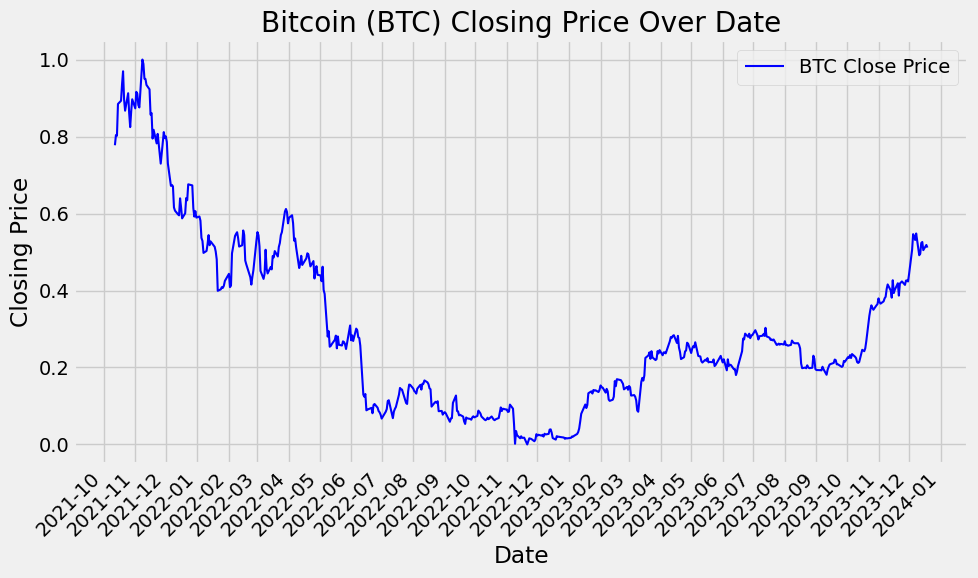

In [ ]:
#plot close price
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' column to datetime type if needed
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set 'Date' column as index
merged_df.set_index('Date', inplace=True)

# Plot close price
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['BTC-USD Close'], color='blue', linewidth=1.5, label='BTC Close Price')

# Format date labels to display only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.title('Bitcoin (BTC) Closing Price Over Date')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'Date' is in the index, reset index to bring 'Date' back as a column
merged_df.reset_index(inplace=True)

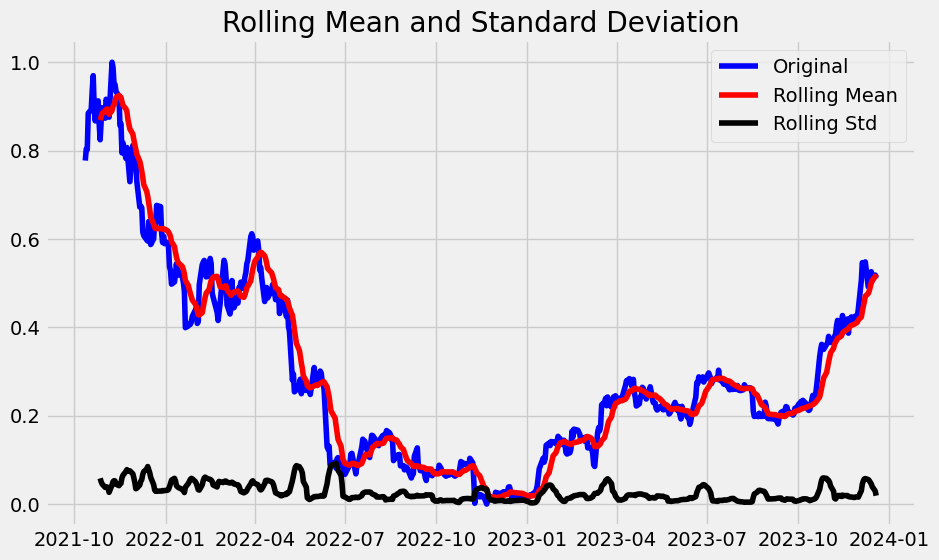

Results of dickey fuller test
Test Statistics                 -1.952044
p-value                          0.307987
No. of lags used                 0.000000
Number of observations used    550.000000
critical value (1%)             -3.442296
critical value (5%)             -2.866809
critical value (10%)            -2.569576
dtype: float64


Explanation:
We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. 
Also, the test statistics is greater than the critical values. so the data is non-stationary.


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
df_close = merged_df['BTC-USD Close']
test_stationarity(df_close)

print("\n\nExplanation:\nWe see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. \nAlso, the test statistics is greater than the critical values. so the data is non-stationary.")



Explanation:
Use 'additive' because this model assumes that the seasonal component is constant across the series,
which may be more appropriate for time series with zero or negative values.


<Figure size 1000x600 with 0 Axes>

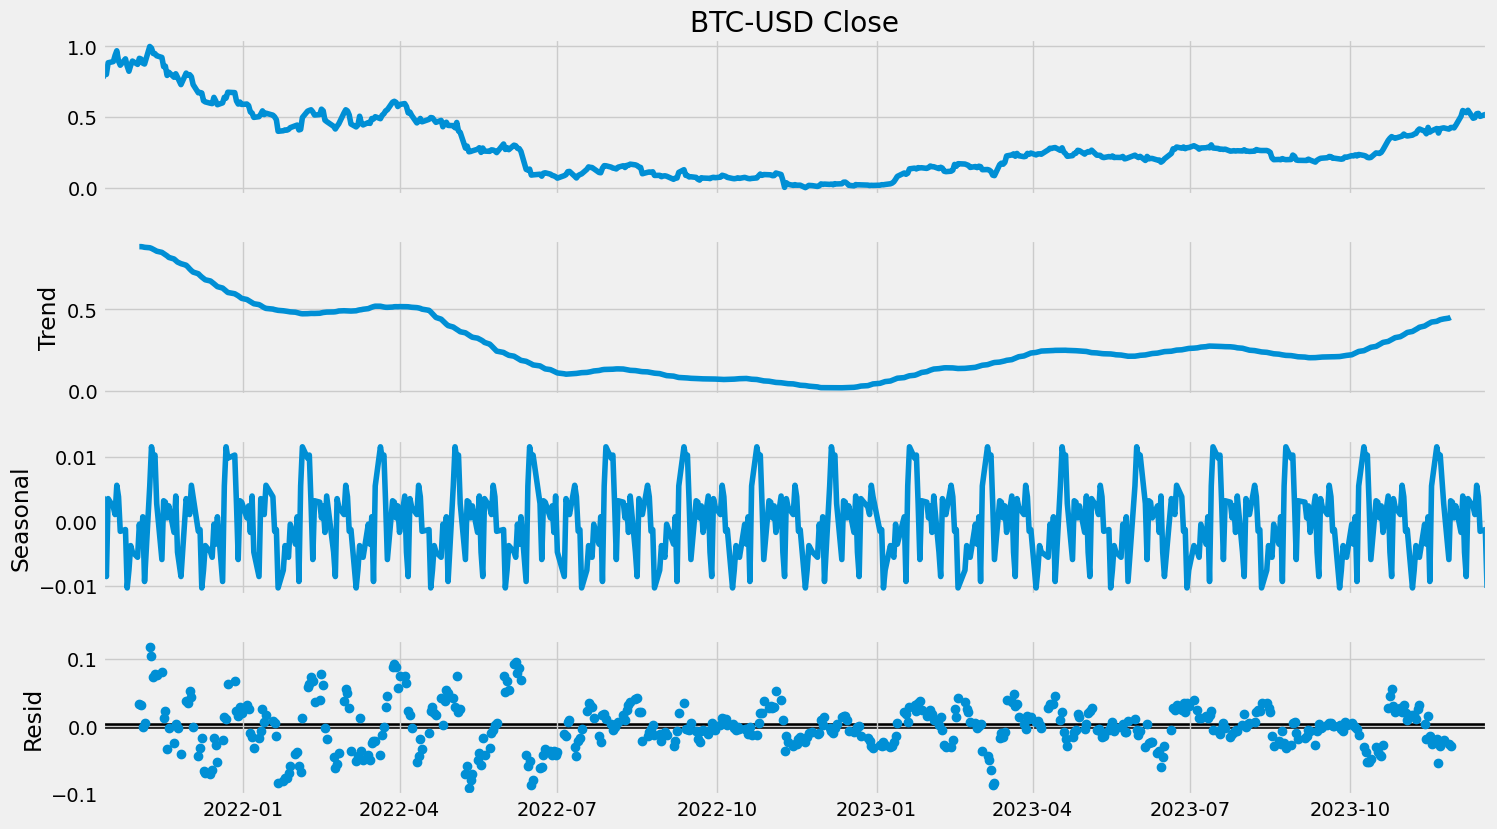

In [ ]:
#separate seasonality and trend from our series. The resultant series will become stationary through this process.
#decompose series
result = seasonal_decompose(df_close, model='additive', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


print("\n\nExplanation:\nUse 'additive' because this model assumes that the seasonal component is constant across the series,\nwhich may be more appropriate for time series with zero or negative values.")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


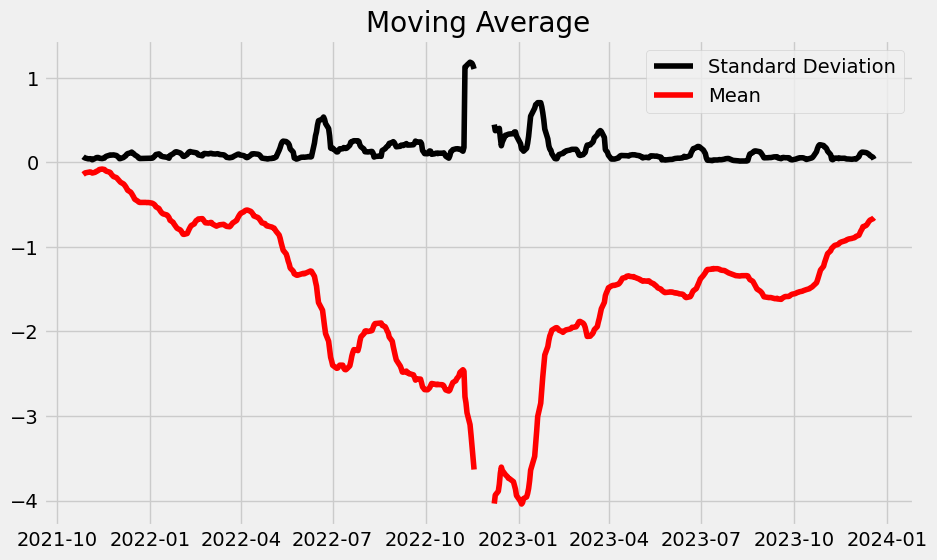

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


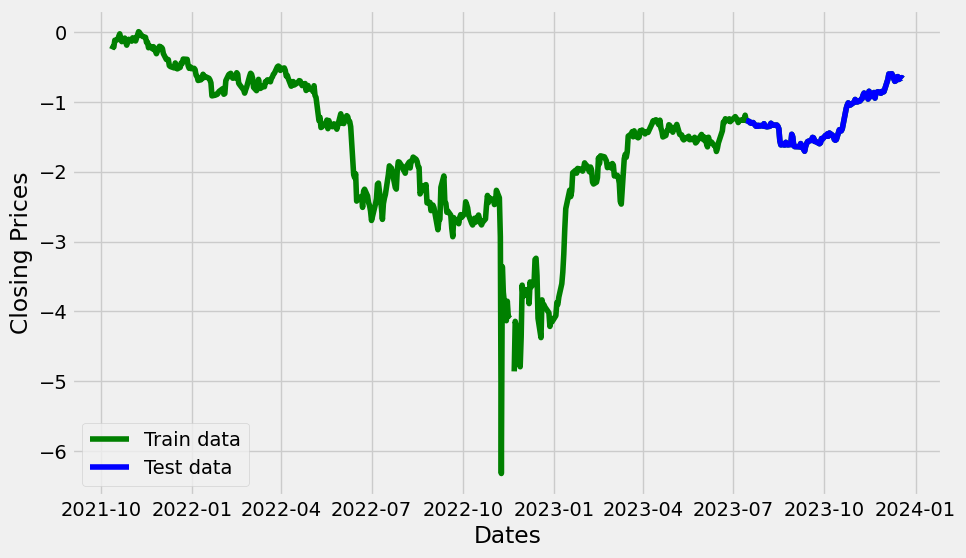

In [ ]:
#split data into train and training set
train_data, test_data = df_log[:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
train_data.describe()

count    4.400000e+02
mean             -inf
std               NaN
min              -inf
25%     -2.349233e+00
50%     -1.493917e+00
75%     -7.578486e-01
max      2.220446e-16
Name: BTC-USD Close, dtype: float64

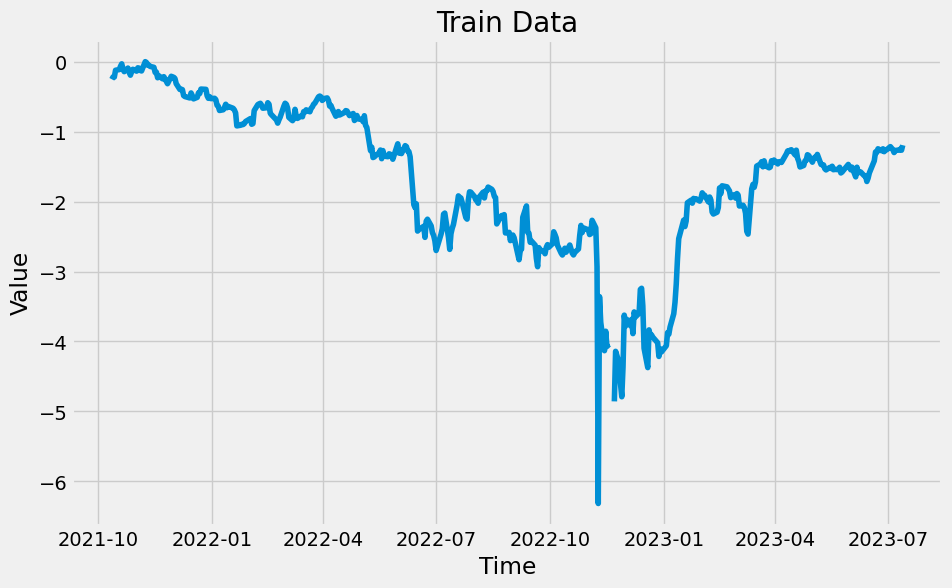

In [ ]:
plt.plot(train_data)
plt.title('Train Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
# Example: Replace infinite values with NaN and then drop NaN values
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.dropna(inplace=True)


In [ ]:
#training model
model = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model
model.fit(train_data)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=59.779, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-2.917, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-1.367, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-1.934, Time=0.58 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-0.088, Time=1.11 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1.638, Time=1.99 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=13.657, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-1.237, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-0.880, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-0.128, Time=1.60 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1.870, Time=2.00 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-3.642, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-1.882, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-0.184, Time=0.91 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-2.398, Time=2.09 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2,1,0))  
fitted = model.fit()  
fitted.summary()

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          BTC-USD Close   No. Observations:                  439
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   5.772
Date:                Sun, 24 Mar 2024   AIC                             -5.544
Time:                        12:11:02   BIC                              6.703
Sample:                             0   HQIC                            -0.712
                                - 439                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3890      0.015    -25.857      0.000      -0.419      -0.360
ar.L2         -0.2070      0.068     -3.051      0.002      -0.340      -0.074
sigma2         0.0570      0.000    114.665      0.000       0.056       0.058
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            280001.34
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                            -7.41
Prob(H) (two-sided):                  0.00   Kurtosis:                       125.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast
forecast_values = fitted.forecast(111, alpha=0.05)
forecast_values


/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


439   -1.218689
440   -1.223931
441   -1.216791
442   -1.218484
443   -1.219303
         ...   
545   -1.218778
546   -1.218778
547   -1.218778
548   -1.218778
549   -1.218778
Name: predicted_mean, Length: 111, dtype: float64

In [ ]:
mse = mean_squared_error(test_data, forecast_values)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast_values)
print('MAE: '+str(mae))

from sklearn.metrics import r2_score, accuracy_score, classification_report
r2 = r2_score(test_data, forecast_values)
print('r2_score: '+str(r2))



MSE: 0.1063572791659149
MAE: 0.293776209227583
r2_score: -0.007093413013252503


In [ ]:
# Make as pandas series
fc_series = pd.Series(forecast_values, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'conf' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84adc6f1-a70e-4d8d-9cc6-0672f4fd6bc6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>